In [51]:
import pandas as pd
import numpy as np

In [52]:
data = pd.read_csv('/content/anime.csv')
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


# DATA CLEANING

In [53]:
print(data.duplicated().sum())

0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [55]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

**The missing values are very few, lets drop them.**

In [56]:
data = data.dropna(subset=['genre', 'type', 'rating'], axis=0)

In [57]:
data.shape

(12017, 7)

In [58]:
data['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [59]:
data[data['episodes'] == 'Unknown'].head()

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400


**There is an 'unknown' value in episodes, lets drop them**

In [60]:
#REPLACE 'UNKNOWN' WITH NP.NAN
data['episodes'] = data['episodes'].replace({'Unknown' : np.nan}, regex=True)

In [61]:
data = data.dropna()

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11830 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11830 non-null  int64  
 1   name      11830 non-null  object 
 2   genre     11830 non-null  object 
 3   type      11830 non-null  object 
 4   episodes  11830 non-null  object 
 5   rating    11830 non-null  float64
 6   members   11830 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 739.4+ KB


In [63]:
len(data.anime_id.unique())

11830

In [64]:
len(data.name.unique())

11828

In [65]:
data['name'].value_counts()

name
Shi Wan Ge Leng Xiaohua                                       2
Saru Kani Gassen                                              2
Akai Kutsu! Onnanoko!                                         1
Golden Batman                                                 1
Pussycat                                                      1
                                                             ..
Days                                                          1
Di Gi Charat Natsuyasumi Special                              1
Eiyuu Densetsu: Sora no Kiseki The Animation                  1
Fresh Precure! Movie: Omocha no Kuni wa Himitsu ga Ippai!?    1
Yasuji no Pornorama: Yacchimae!!                              1
Name: count, Length: 11828, dtype: int64

**Lets check the range of rating**

In [66]:
 a = data['rating'].max()
 b = data['rating'].min()
 print(b, 'to', a)

1.67 to 10.0


**Lets convert them into simple 1 to 10 integer range.**

In [67]:
import numpy as np

def convert_ratings(ratings):
    # Convert ratings to numpy array for easy manipulation
    ratings = np.array(ratings)

    # Scale ratings to a 1-10 integer scale
    scaled_ratings = 1 + 9 * (ratings - b) / (a - b)

    # Round to the nearest integer
    integer_ratings = np.round(scaled_ratings).astype(int)

    return integer_ratings

data['rating'] = convert_ratings(data['rating'])


In [68]:
data['rating'].value_counts()

rating
6     4138
7     3707
5     1934
8     1123
4      632
3      193
9       76
2       23
1        3
10       1
Name: count, dtype: int64

In [69]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,151266


# DATA VISUALIZATION

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

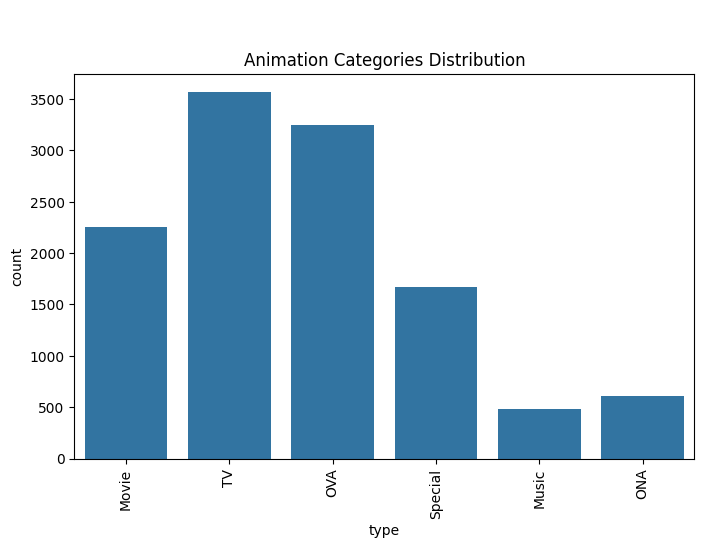

In [71]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data.type)
plt.xticks(rotation='vertical')
plt.title("\n\nAnimation Categories Distribution")
plt.show()

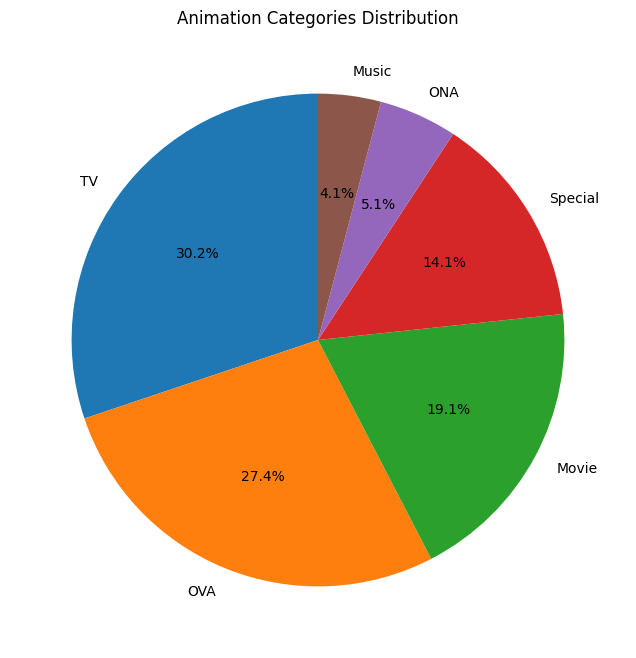

In [72]:
type_counts = data['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Animation Categories Distribution')
plt.show()


* **Approx. 3500 of animations on TV, which is 30.2% of total animations.**
* **Approx. 2200 of animations are movies, which is 19.1% of total animations.**
* **After TV animations, OVA is most common, which is 27.4% of total animations.**

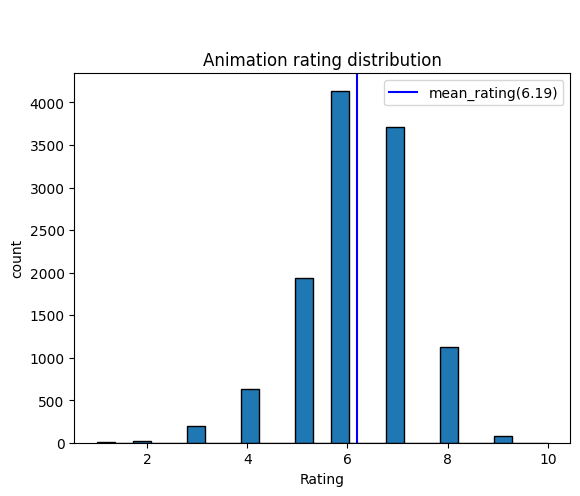

In [73]:
plt.hist(data.rating , edgecolor='black' , bins=(25))

plt.axvline(data.rating.mean() , label=f'mean_rating({data.rating.mean():1.2f})' , color="blue")

plt.xlabel("Rating")
plt.ylabel("count")
plt.title("\n\nAnimation rating distribution")
plt.legend()
plt.show()

**Most of the users have given 6 ratings.**

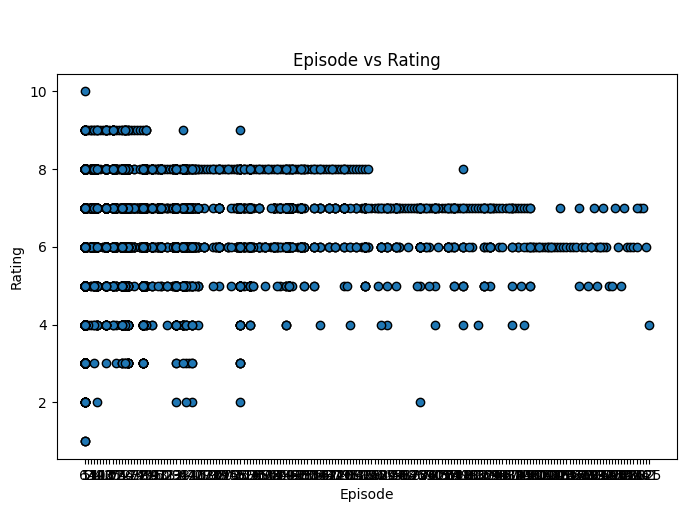

In [74]:
plt.figure(figsize=(8, 5))
plt.scatter(data.episodes, data.rating , linewidth=1, edgecolor='black')

plt.xlabel("Episode")
plt.ylabel("Rating")
plt.title("\n\nEpisode vs Rating")
plt.show()

**Short episodes have somewhat higher ratings.**

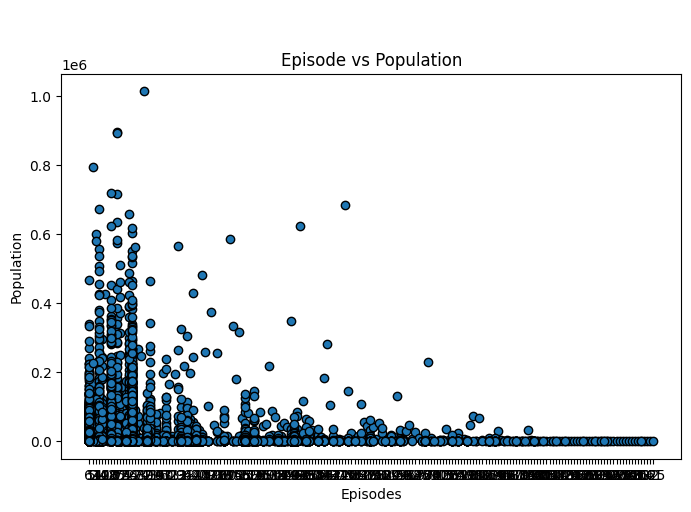

In [75]:
plt.figure(figsize=(8, 5))
plt.scatter(data.episodes, data.members , linewidth=1, edgecolor='black')

plt.xlabel("Episodes")
plt.ylabel("Population")
plt.title("\n\nEpisode vs Population")
plt.show()

**Low episodes have more population than high episodes.**

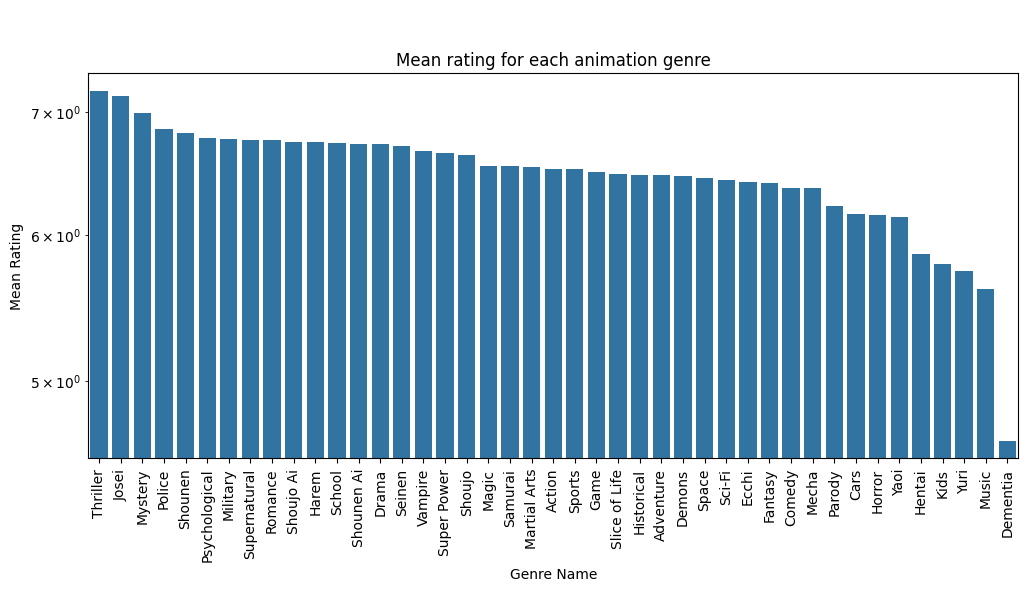

In [76]:
#use explode function to duplicate rows for each genre
data['genre'] = data['genre'].str.split(', ')
anime_exploded = data.explode('genre')
anime_exploded
genre_rated = anime_exploded.groupby('genre')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))

sns.barplot(x=genre_rated.index , y=genre_rated , log=True)
plt.xlabel("Genre Name")
plt.ylabel('Mean Rating')
plt.title("\n\nMean rating for each animation genre")
plt.xticks(rotation=90)

plt.show()

**'Thriller' and 'Josei genre has the highest ratings.**

# RECOMMENDATION SYSTEM

In [77]:
data = data.drop(columns=['members'])
data

,anime_id,name,genre,type,episodes,rating
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9
...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],OVA,1,4
12290,5543,Under World,[Hentai],OVA,1,4
12291,5621,Violence Gekiga David no Hoshi,[Hentai],OVA,4,4
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],OVA,1,5


In [78]:
data['genre'] = data['genre'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [79]:
data['tags'] = data['genre']+','+ data['type']
data = data.drop(columns=['type','genre'])
data

,anime_id,name,episodes,rating,tags
0,32281,Kimi no Na wa.,1,9,"Drama, Romance, School, Supernatural,Movie"
1,5114,Fullmetal Alchemist: Brotherhood,64,9,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,51,9,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,24,9,"Sci-Fi, Thriller,TV"
4,9969,Gintama&#039;,51,9,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4,"Hentai,OVA"
12290,5543,Under World,1,4,"Hentai,OVA"
12291,5621,Violence Gekiga David no Hoshi,4,4,"Hentai,OVA"
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,5,"Hentai,OVA"


In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [81]:
vector = cv.fit_transform(data['tags']).toarray()
vector.shape

(11830, 51)

In [82]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.15811388, 0.        , ..., 0.        , 0.        ,
        0.31622777],
       [0.15811388, 1.        , 0.35355339, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35355339, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.31622777, 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [86]:
def recommend(anime):
    index = data[data['name'] == anime].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(data.iloc[i[0]]['name'])

In [87]:
data[data['name'] == 'Under World'].index[0]

12290

**NOW ASK FOR RECOMMENDATIONS**

In [88]:
recommend('Fullmetal Alchemist: Brotherhood')

Fullmetal Alchemist
Magi: The Kingdom of Magic
Magi: The Labyrinth of Magic
Magi: Sinbad no Bouken (TV)
Densetsu no Yuusha no Densetsu


# INTERVIEW QUESTIONS

**1. Can you explain the difference between user-based and item-based collaborative filtering?**

* User-based and item-based collaborative filtering are two fundamental approaches in recommendation systems that leverage user-item interaction data to make predictions.
* User-based collaborative filtering focuses on finding users who share similar preferences or rating patterns with the target user. It then recommends items that these similar users have liked or rated highly.
* In contrast, item-based collaborative filtering identifies items that are similar to those the target user has already shown interest in and recommends those items.
* The key difference lies in the similarity focus:
user-based filtering measures similarity between users,
while item-based filtering measures similarity between items.
* Item-based collaborative filtering often handles data sparsity better and scales more efficiently because there are typically fewer items than users in large systems.

**2. What is collaborative filtering, and how does it work?**

*Collaborative Filtering:*

* Collaborative filtering is a technique used by recommender systems to predict a user's preferences by collecting preferences from many users.
* It aims to recommend items (such as movies, books, products) that a user might like based on the preferences of similar users.

*How It Works:*

* **Data Collection:**

Collect data on user interactions with items, such as ratings, purchases, views, likes, etc.

* **Data Representation:**

Represent this data in a user-item matrix where rows correspond to users and columns correspond to items. The matrix entries represent user preferences for items (e.g., ratings).

* **Similarity Calculation:**

    *a. For User-Based Collaborative Filtering:* Calculate similarity between users using similarity metrics (e.g., Pearson correlation, cosine similarity).
Identify users who are similar to the target user.

    *b. For Item-Based Collaborative Filtering:* Calculate similarity between items using similarity metrics (e.g., Pearson correlation, cosine similarity).
Identify items that are similar to items the target user has rated highly.

* **Prediction:**

    *a. For User-Based Collaborative Filtering:*
Predict a rating for an item by the target user based on ratings from similar users.

    *b. For Item-Based Collaborative Filtering:*
Predict a rating for an item by the target user based on the target user's ratings for similar items.

* **Recommendation Generation:**
Recommend items with the highest predicted ratings that the user has not interacted with yet.

*Advantages:*

1. No need for item metadata (purely based on user interactions).
2. Can capture complex user-item interactions.

*Challenges:*

1. Cold Start Problem: New users and new items have little to no interaction data, making it hard to provide recommendations.
2. Data Sparsity: User-item interaction matrices are often sparse, with many missing entries.
3. Scalability: Large datasets with many users and items can lead to scalability issues.

Collaborative filtering is widely used in various recommendation systems due to its effectiveness in capturing and leveraging user preferences for making personalized recommendations.
